##### 在开始寻找最好的模型参数（model parameters）w和b之前， 我们还需要两个东西： （1）一种模型质量的度量方式； （2）一种能够更新模型以提高模型预测质量的方法。

##### 本书中我们用到一种名为梯度下降（gradient descent）的方法， 这种方法几乎可以优化所有深度学习模型。 它通过不断地在损失函数递减的方向上更新参数来降低误差。梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值） 关于模型参数的导数（在这里也可以称为梯度）

##### 在训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。 为了实现这一点，需要我们对计算进行矢量化， 从而利用线性代数库，而不是在Python中编写开销高昂的for循环

In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [3]:
# 矢量化为何如此重要 ?
n = 10000
a = torch.ones([n])
b = torch.ones([n])
# 接下来我们定义一个计时器，进行运行时间的基准测试

In [4]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [5]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.06728 sec'

In [6]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00000 sec'

In [7]:
def normal(x, mu, sigma): # 正态分布
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

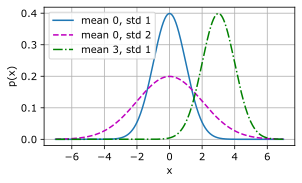

In [10]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x,mu,sigma) for mu, sigma, in params], xlabel = 'x',
         ylabel = 'p(x)', figsize = (4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])